### **本节介绍参数更新的技巧**

下面均以函数${\bf y = \frac{1}{20}x^2 + y^2} $ 为例，易知<strong>（0，0）</strong>处取最小值

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
import my_frame as mf # 导入我的框架

# 定义函数
def function_test(x):
    return 1.0/20.0*x[0]*x[0] + x[1]*x[1]

In [5]:
# 模板测试函数
def Test_optimizer(optimizer):
    """测试函数"""
    # 初始化函数自变量x
    x = np.array([-7,2],np.float32)

    # 记录过程中的自变量
    x_save = []
    y_save = []
    x_save.append(x[0])
    y_save.append(x[1])

    # 定义更新次数
    iter_nums = 100

    # 开始寻找最小值
    for i in range(iter_nums):
    # 计算梯度
        grads_temp = mf.numerical_gradient(function_test,x)
    # print(grads_temp)
        params = {} 
        grads = {}
        params['x'] = x[0]
        params['y'] = x[1]
        grads['x'] = grads_temp[0]
        grads['y'] = grads_temp[1]

        # 更新参数
        optimizer.update(params,grads)
        x[0] = params['x']
        x[1] = params['y']

        # 记录数据
        x_save.append(x[0])
        y_save.append(x[1])

    plt.plot(x_save,y_save,label = 'Move',linewidth = 1)
    plt.legend()
    plt.show()

**一：SGD（随机梯度下降法）**

更新原理：$ {\bf W} \leftarrow {\bf W} - \eta \dfrac{\partial L}{\partial {\bf W}}$

**效果好坏主要取决于函数及学习率**

In [6]:
# 将SGD进行类封装
class SGD:
    """随机梯度下降算法"""
    def __init__(self,learning_rate = 0.01):
        self.lr = learning_rate

    def update(self,params,grads):
        for key in params.keys():
            params[key] -= self.lr*grads[key]

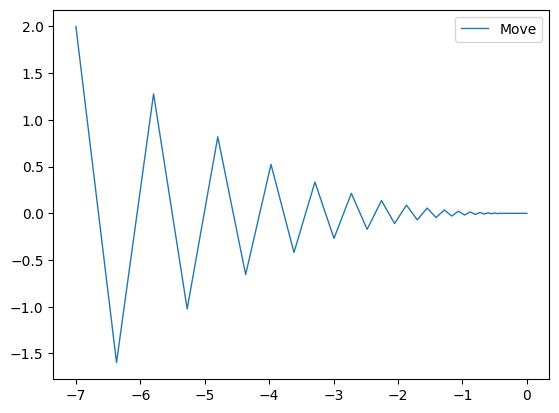

In [7]:
Test_optimizer(SGD(learning_rate = 0.9))

# 发现每次更新的方向并不是向着最小值的位置
# 当然，当学习率选择合适的时候，如0.1则效果依旧好

**二，Momentum（物理动量算法）**

更新原理：$ v  \leftarrow  \alpha v \; {\bf-} \; \eta \dfrac{\partial L}{\partial {\bf W}} $  
$ \qquad \;\;\;\;\;\;\;{\bf W} \leftarrow {\bf W} + v$

**具体原理较难理解**，实现如下

In [8]:
# 定义一个Momentum优化器
class Momentum:
    """Momentum算法"""
    def __init__(self,learning_rate = 0.01,momentum = 0.9):
        self.lr = learning_rate
        self.momentum = momentum
        self.v = None

    def update(self,params,grads):
        if self.v is None:
            self.v = {}
            for key,val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

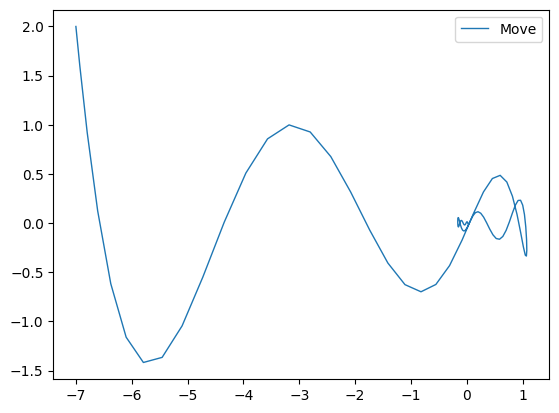

In [12]:
Test_optimizer(Momentum(learning_rate = 0.1))

# 发现 “之” 型路线在一定程度上减缓

***
在神经网络的学习中，学习率（数学式中记为η）的值很重要。  
学习率过小，会导致学习花费过多时间；反过来，学习率过大，则会导致学习发散而不能正确进行

下面介绍的便是一种学习率衰减算法

**三，AdaGrad（学习率衰减算法Adaptive Gradent）**

更新原理：  
$ h \leftarrow h + \dfrac{\partial L}{\partial {\bf W}} \odot \dfrac{\partial L}{\partial {\bf W}} $  

$ {\bf W} \leftarrow {\bf W} - \eta {\large \frac{1}{\bf \sqrt h}}\dfrac{\partial L}{\partial {\bf W}} $

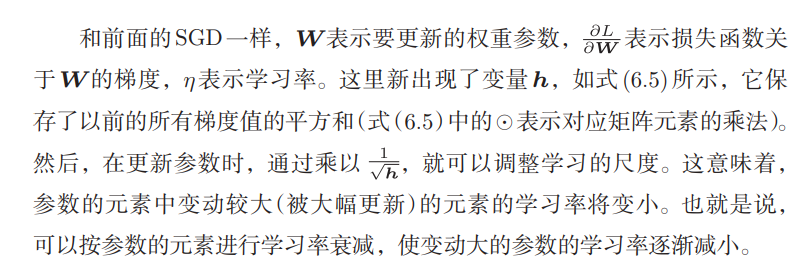

**具体实现如下**

In [14]:
# 定义AdaGrad优化器
class AdaGrad:
    """学习率衰减算法"""
    def __init__(self,learning_rate = 0.01):
        self.lr = learning_rate
        self.h = None
    
    def update(self,params,grads):
        if self.h is None:
            self.h = {}
            for key,val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key]*grads[key]
            params[key] -= self.lr*grads[key]/np.sqrt(self.h[key] + 1e-7) # 加上微小值防止除0错误

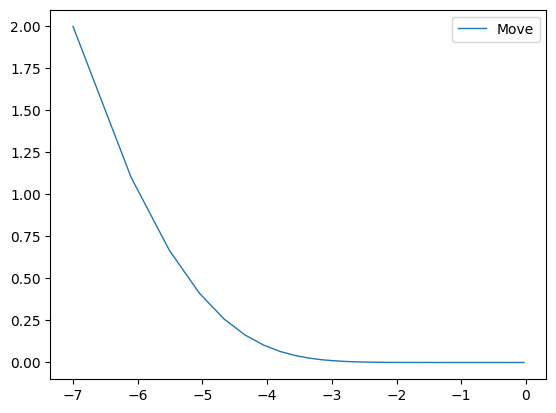

In [20]:
Test_optimizer(AdaGrad(learning_rate = 0.9))

# 在相同学习率的情况下，与SGD对比，发现效果非常好

**四，Adam（Momentum与AdaGrad互补算法）**

由于实现复杂，具体实现可自行查找论文

**总结：**

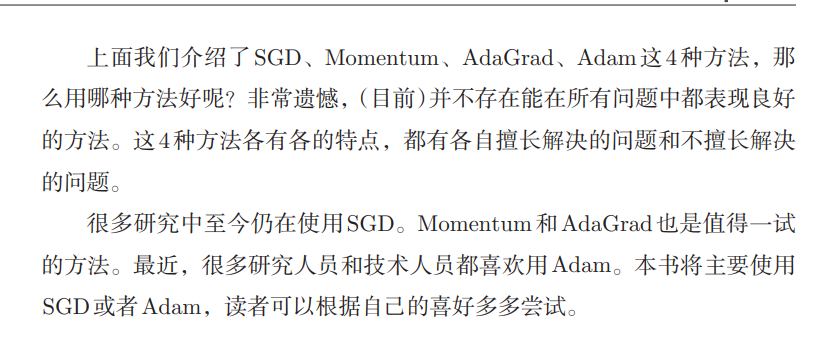